# SDA - Project <a id='intro'></a>

## Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Description of the Plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

### Surf Plan
- **Monthly Charge:** 20 USD
- **Package Limits:**
  - 500 monthly minutes
  - 50 text messages
  - 15 GB of data
- **Exceeding Package Limits:**
  - 1 minute: 3 cents
  - 1 text message: 3 cents
  - 1 GB of data: 10 USD

### Ultimate Plan
- **Monthly Charge:** 70 USD
- **Package Limits:**
  - 3000 monthly minutes
  - 1000 text messages
  - 30 GB of data
- **Exceeding Package Limits:**
  - 1 minute: 1 cent
  - 1 text message: 1 cent
  - 1 GB of data: 7 USD
  
## Instructions on Completing the Project

### Step 1: Open the Data File and Study the General Information
- File path: 
  - /datasets/megaline_calls.csv
  - /datasets/megaline_internet.csv
  - /datasets/megaline_messages.csv
  - /datasets/megaline_plans.csv
  - /datasets/megaline_users.csv

### Step 2: Prepare the Data
- Convert the data to the necessary types
- Find and eliminate errors in the data
- Explain what errors you found and how you removed them
- For each user, find:
  - The number of calls made and minutes used per month
  - The number of text messages sent per month
  - The volume of data per month
  - The monthly revenue from each user

### Step 3: Analyze the Data
- Describe the customers' behavior
- Find the minutes, texts, and volume of data the users of each plan require per month
- Calculate the mean, variance, and standard deviation
- Plot histograms
- Describe the distributions

### Step 4: Test the Hypotheses
- The average revenue from users of Ultimate and Surf calling plans differs
- The average revenue from users in NY-NJ area is different from that of the users from other regions
- Explain:
  - How you formulated the null and alternative hypotheses
  - What criterion you used to test the hypotheses and why

### Step 5: Write an Overall Conclusion


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

## Load data

In [2]:
# Load the data files into different DataFrames

In [3]:
try:
    # Try to read the CSV file from the local path.
    calls = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_3/SDA_Project/datasets/megaline_calls.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        calls = pd.read_csv('/datasets/megaline_calls.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [4]:
try:
    # Try to read the CSV file from the local path.
    internet = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_3/SDA_Project/datasets/megaline_internet.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        internet = pd.read_csv('/datasets/megaline_internet.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [5]:
try:
    # Try to read the CSV file from the local path.
    messages = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_3/SDA_Project/datasets/megaline_messages.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        messages = pd.read_csv('/datasets/megaline_messages.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [6]:
try:
    # Try to read the CSV file from the local path.
    plans = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_3/SDA_Project/datasets/megaline_plans.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        plans = pd.read_csv('/datasets/megaline_plans.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [7]:
try:
    # Try to read the CSV file from the local path.
    users = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_3/SDA_Project/datasets/megaline_users.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        users = pd.read_csv('/datasets/megaline_users.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


## Prepare the data

In [8]:
# Function that gives an overview of the data
def analyze(df):
    print("DATA FRAME HEAD:")
    display(df.head())
    print()
    print("DATA FRAME TAIL:")
    display(df.tail())
    print()
    print("DATA FRAME INFO:")
    df.info()
    print()
    print("DUPLICATE ROWS:")
    print(df[df.duplicated()])
    print()
    print("NUMBER OF DUPLICATE ROWS:", df.duplicated().sum())
    return None

## Plans

In [9]:
# Print the general/summary information about the plans' DataFrame
# Print a sample of data for plans
print("DATA FRAME:")
display(plans)
print("DATA FRAME INFO:")
plans.info()

DATA FRAME:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


The provided data frames outline two telecommunications pricing plans: "surf" and "ultimate". Each plan includes allowances for text messages, data usage, and call minutes, alongside associated costs for exceeding these limits. The data appears complete with no missing values, but there are opportunities for optimization and clarity, such as including a 'gb_per_month" column as Megaline seems to make it standard in pricing data used in gigabytes rather than megabytes.

## Enrich data

In [10]:
# insert 'gb_per_month column'
plans.insert(2, 'gb_per_month', [15, 30])

# rename columns to fit a more consistent naming convention
plans.rename(columns= {plans.columns[0]:'messages_per_month', 
                       plans.columns[1]:'mb_per_month', 
                       plans.columns[3]:'mins_per_month', 
                       plans.columns[4]:'usd_per_month', 
                       plans.columns[8]:'plan'}, inplace=True)
plans

,messages_per_month,mb_per_month,gb_per_month,mins_per_month,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,15,500,20,10,0.03,0.03,surf
1,1000,30720,30,3000,70,7,0.01,0.01,ultimate


## Users

In [11]:
# Print the general/summary information about the users' DataFrame
# Print a sample of data for users
analyze(users)

DATA FRAME HEAD:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



DATA FRAME TAIL:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

DUPLICATE ROWS:
Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

NUMBER OF DUPLICATE ROWS: 0


In [12]:
"Check if there are any duplicate User IDs"
print(users[users['user_id'].duplicated()])
print()
print("NUMBER OF DUPLICATE USER IDs:", len(users[users['user_id'].duplicated()]))

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

NUMBER OF DUPLICATE USER IDs: 0


The users' DataFrame consists of 500 entries, each representing a user with information including user ID, name, age, city, registration date, selected plan, and churn date. There are no duplicate rows within the DataFrame. However, there are 34 non-null values in the 'churn_date' column, indicating the calling plan was being used when this database was extracted. The data types seem appropriate for the columns and the DataFrame appears to be well-structured and ready for further exploration and analysis.

### Fix Data

In [13]:
# fill missing values with ''
users['churn_date'].fillna('', inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame
# Print a sample of data for calls
analyze(calls)

DATA FRAME HEAD:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



DATA FRAME TAIL:


,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

DUPLICATE ROWS:
Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []

NUMBER OF DUPLICATE ROWS: 0


The calls DataFrame comprises 137,735 entries, detailing call records including user ID, call date, and call duration. There are no duplicate rows present in the DataFrame. The data types seem appropriate for the columns. Each call record is uniquely identified by the 'id' column. We can enrich this data by creatin a new column with the 'duration' values rounded up to the nearest minute, as Megaline seems to make it standard in pricing call durations based on minutes rounded rather than seconds. We can also rename the 'id' column to 'call_id' to provide clarification and avoid confusion with the 'user_id' column as well as add a 'month' column which we will utilize later when analyizng the data.

### Enrich data

In [15]:
# create a new column with the 'duration' values rounded up to the nearest minute
calls['duration_mins'] = np.ceil(calls['duration']).astype(int)

# rename 'duration' column to 'duration_exact' to provide clarification and avoid confusion
calls.rename(columns={'duration':'duration_exact'}, inplace=True)

# add a column with the month the call was made in
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

# rename 'id' column to 'call_id' to provide clarification and avoid confusion
calls.rename(columns= {'id':'call_id'}, inplace=True)

analyze(calls)

DATA FRAME HEAD:


,call_id,user_id,call_date,duration_exact,duration_mins,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12



DATA FRAME TAIL:


,call_id,user_id,call_date,duration_exact,duration_mins,month
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10
137734,1499_203,1499,2018-12-29,13.86,14,12



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   call_id         137735 non-null  object 
 1   user_id         137735 non-null  int64  
 2   call_date       137735 non-null  object 
 3   duration_exact  137735 non-null  float64
 4   duration_mins   137735 non-null  int64  
 5   month           137735 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.3+ MB

DUPLICATE ROWS:
Empty DataFrame
Columns: [call_id, user_id, call_date, duration_exact, duration_mins, month]
Index: []

NUMBER OF DUPLICATE ROWS: 0


## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
# Print a sample of data for messages
analyze(messages)

DATA FRAME HEAD:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



DATA FRAME TAIL:


,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

DUPLICATE ROWS:
Empty DataFrame
Columns: [id, user_id, message_date]
Index: []

NUMBER OF DUPLICATE ROWS: 0


The messages DataFrame contains 76,051 entries, representing individual text messages sent by users. Each entry includes the user ID, message date, and a unique identifier 'id' for each message. There are no duplicate rows within the DataFrame. The data types seem appropriate for the columns and the DataFrame appears well-structured and suitable for further exploration and analysis. However, we can make some improvements such as renaming the 'id' column to 'message_id' to provide clarification and avoid confusion with the 'user_id' column as well as add a 'month' column which we will utilize later when analyizng the data.

### Enrich data

In [17]:
# add a column with the month the message was sent in
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# rename 'id' column to 'message_id' to provide clarification and avoid confusion
messages.rename(columns= {'id':'message_id'}, inplace=True)
messages

,message_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
# Print a sample of data for the internet traffic
analyze(internet)

DATA FRAME HEAD:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



DATA FRAME TAIL:


,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

DUPLICATE ROWS:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []

NUMBER OF DUPLICATE ROWS: 0


The internet DataFrame consists of 104,825 entries, detailing internet usage sessions by users. Each entry includes the user ID, session date, and the amount of data used in megabytes ('mb_used'). There are no duplicate rows present in the DataFrame. The data types seem appropriate for the columns and the DataFrame appears well-structured and suitable for further exploration and analysis. However, we can make some improvements such as renaming the 'id' column to 'session_id' to provide clarification and avoid confusion with the 'user_id' column as well as add a 'month' column which we will utilize later when analyizng the data.

### Enrich data

In [19]:
# add a column with the month the session was in
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

# rename 'id' column to 'session_id' to provide clarification and avoid confusion
internet.rename(columns= {'id':'session_id'}, inplace=True)
internet

,session_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Study plan conditions

In [20]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_per_month,mb_per_month,gb_per_month,mins_per_month,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,15,500,20,10,0.03,0.03,surf
1,1000,30720,30,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean, we aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [21]:
# Calculate the number of calls made by each user per month. Save the result.
num_calls_per_month = calls.groupby(['user_id', 'month'])['call_id'].count().reset_index()
num_calls_per_month

,user_id,month,call_id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
num_mins_per_month = calls.groupby(['user_id', 'month'])['duration_mins'].sum().reset_index()
num_mins_per_month

,user_id,month,duration_mins
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [23]:
# Calculate the number of messages sent by each user per month. Save the result.
num_messages_per_month = messages.groupby(['user_id', 'month'])['message_id'].count().reset_index()
num_messages_per_month

,user_id,month,message_id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [24]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['gb_used'] = internet['mb_used'] / 1024
traffic_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum().apply(np.ceil).astype(int).reset_index()

internet.drop('gb_used', axis=1, inplace=True)

display(traffic_per_month)

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


We put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [25]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_consumption = num_calls_per_month.merge(num_mins_per_month, on=['user_id', 'month'], how='outer')
user_consumption = user_consumption.merge(num_messages_per_month, on=['user_id', 'month'], how='outer')
user_consumption = user_consumption.merge(traffic_per_month, on=['user_id', 'month'], how='outer')

# fill missing values with zeros
user_consumption.fillna(0, inplace=True)

# rename columns to fit a more consistent naming convention
user_consumption.rename(columns= {user_consumption.columns[2]:'num_calls_made', 
                                  user_consumption.columns[3]:'num_mins_used', 
                                  user_consumption.columns[4]:'num_messages_sent', 
                                  user_consumption.columns[5]:'num_gb_used'}, inplace=True)

analyze(user_consumption)

DATA FRAME HEAD:


,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0



DATA FRAME TAIL:


,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0
2292,1311,6,0.0,0.0,0.0,2.0



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2293 non-null   int64  
 1   month              2293 non-null   int64  
 2   num_calls_made     2293 non-null   float64
 3   num_mins_used      2293 non-null   float64
 4   num_messages_sent  2293 non-null   float64
 5   num_gb_used        2293 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB

DUPLICATE ROWS:
Empty DataFrame
Columns: [user_id, month, num_calls_made, num_mins_used, num_messages_sent, num_gb_used]
Index: []

NUMBER OF DUPLICATE ROWS: 0


In [26]:
# Add the plan information
user_plans = users[['user_id', 'city', 'plan']]
user_consumption = user_consumption.merge(user_plans, on='user_id', how='outer')
user_consumption = user_consumption.merge(plans, on='plan', how='outer')

# fill missing values with zeros
user_consumption.fillna(0, inplace=True)

user_consumption.rename(columns= {user_consumption.columns[8]:'num_messages_allowed', 
                                  user_consumption.columns[9]:'num_mb_allowed', 
                                  user_consumption.columns[10]:'num_gb_allowed',
                                  user_consumption.columns[11]:'num_mins_allowed'}, inplace=True)

user_consumption

,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used,city,plan,num_messages_allowed,num_mb_allowed,num_gb_allowed,num_mins_allowed,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01
1,1006,11.0,2.0,10.0,15.0,3.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01
2,1006,12.0,9.0,59.0,139.0,32.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01
3,1008,10.0,71.0,476.0,21.0,17.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01
4,1008,11.0,63.0,446.0,37.0,24.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.0,0.0,"Cincinnati, OH-KY-IN MSA",surf,50,15360,15,500,20,10,0.03,0.03
2299,1307,0.0,0.0,0.0,0.0,0.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,15,500,20,10,0.03,0.03
2300,1319,0.0,0.0,0.0,0.0,0.0,"Colorado Springs, CO MSA",surf,50,15360,15,500,20,10,0.03,0.03
2301,1378,0.0,0.0,0.0,0.0,0.0,"Denver-Aurora-Lakewood, CO MSA",surf,50,15360,15,500,20,10,0.03,0.03


Now we calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [27]:
# Calculate the monthly revenue for each user
def monthly_rev(row):
    if row['num_mins_used'] <= row['num_mins_allowed']:
        min_price = 0
    else:
        min_price = (row['num_mins_used'] - row['num_mins_allowed']) * row['usd_per_minute']
    
    if row['num_messages_sent'] <= row['num_messages_allowed']:
        message_price = 0
    else:
        message_price = (row['num_messages_sent'] - row['num_messages_allowed']) * row['usd_per_message']
    
    if row['num_gb_used'] <= row['num_gb_allowed']:
        data_price = 0
    else:
        data_price = (row['num_gb_used'] - row['num_gb_allowed']) * row['usd_per_gb']
        
    row['monthly_rev'] = min_price + message_price + data_price + row['usd_per_month']
    
    return row['monthly_rev']
        
user_consumption['monthly_rev'] = user_consumption.apply(monthly_rev, axis=1)
user_consumption = user_consumption.sort_values(by=['user_id', 'month'], ascending=True).reset_index(drop=True)

analyze(user_consumption)
print()
user_consumption.describe()

DATA FRAME HEAD:


,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used,city,plan,num_messages_allowed,num_mb_allowed,num_gb_allowed,num_mins_allowed,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute,monthly_rev
0,1000,12.0,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,30,3000,70,7,0.01,0.01,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,15,500,20,10,0.03,0.03,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,15,500,20,10,0.03,0.03,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,15,500,20,10,0.03,0.03,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,15,500,20,10,0.03,0.03,60.00



DATA FRAME TAIL:


,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used,city,plan,num_messages_allowed,num_mb_allowed,num_gb_allowed,num_mins_allowed,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute,monthly_rev
2298,1498,12.0,39.0,339.0,0.0,23.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,15,500,20,10,0.03,0.03,100.0
2299,1499,9.0,41.0,346.0,0.0,13.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,15,500,20,10,0.03,0.03,20.0
2300,1499,10.0,53.0,385.0,0.0,20.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,15,500,20,10,0.03,0.03,70.0
2301,1499,11.0,45.0,308.0,0.0,17.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,15,500,20,10,0.03,0.03,40.0
2302,1499,12.0,65.0,496.0,0.0,22.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,15,500,20,10,0.03,0.03,90.0



DATA FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2303 non-null   int64  
 1   month                 2303 non-null   float64
 2   num_calls_made        2303 non-null   float64
 3   num_mins_used         2303 non-null   float64
 4   num_messages_sent     2303 non-null   float64
 5   num_gb_used           2303 non-null   float64
 6   city                  2303 non-null   object 
 7   plan                  2303 non-null   object 
 8   num_messages_allowed  2303 non-null   int64  
 9   num_mb_allowed        2303 non-null   int64  
 10  num_gb_allowed        2303 non-null   int64  
 11  num_mins_allowed      2303 non-null   int64  
 12  usd_per_month         2303 non-null   int64  
 13  usd_per_gb            2303 non-null   int64  
 14  usd_per_message       2303 non-null   float64
 15  usd

,user_id,month,num_calls_made,num_mins_used,num_messages_sent,num_gb_used,num_messages_allowed,num_mb_allowed,num_gb_allowed,num_mins_allowed,usd_per_month,usd_per_gb,usd_per_message,usd_per_minute,monthly_rev
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.00000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,9.132870,59.806774,427.419453,33.022579,16.797221,348.65393,20188.762484,19.715588,1285.931394,35.718628,9.056882,0.023713,0.023713,64.245410
std,143.044136,2.562964,32.572548,237.490294,34.065907,7.857946,441.14801,7132.666777,6.965495,1160.915817,23.218316,1.393099,0.009287,0.009287,46.579107
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.00000,15360.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,20.000000
25%,1122.000000,8.000000,38.000000,262.500000,3.000000,12.000000,50.00000,15360.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,23.390000
50%,1245.000000,10.000000,60.000000,424.000000,25.000000,17.000000,50.00000,15360.000000,15.000000,500.000000,20.000000,10.000000,0.030000,0.030000,70.000000
75%,1368.000000,11.000000,79.000000,571.500000,51.000000,21.000000,1000.00000,30720.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,70.000000,1000.00000,30720.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,590.370000


## Study user behaviour

Now, we will calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. We will draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.

### Calls

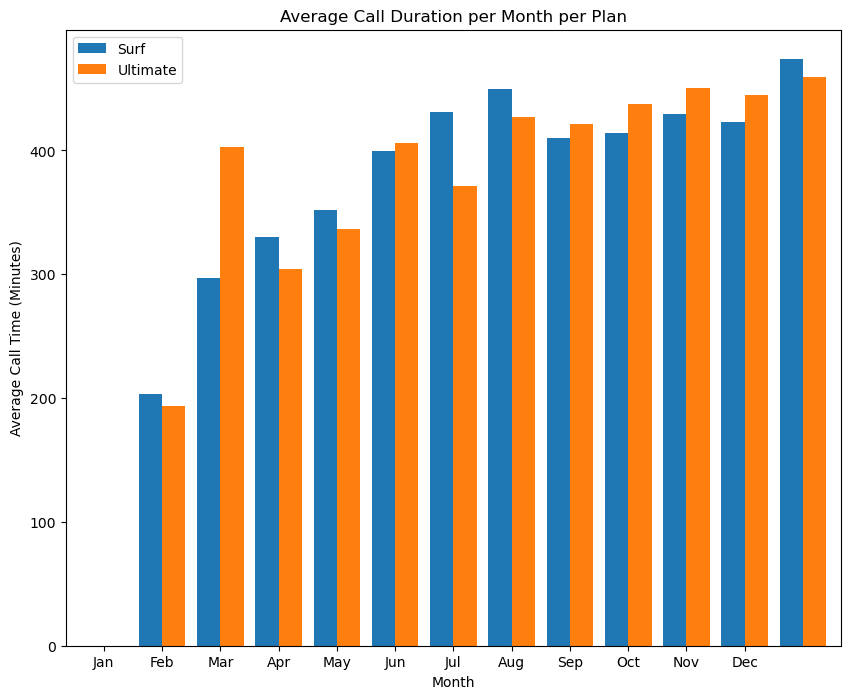

In [28]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_mins_per_plan_per_month = user_consumption.groupby(['month', 'plan'])['num_mins_used'].mean().unstack()
avg_mins_per_plan_per_month.plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Average Call Duration per Month per Plan')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Average Call Time (Minutes)')
plt.legend(['Surf', 'Ultimate'])
plt.show()

As we can see from the bar plot above, for half the months (Jan, Apr, May, Jun, Jul, Dec), users on the Surf Plan have longer call durations on average compared to the Ultimate Plan. But for the other half of the months (Feb, Mar, Aug, Sep, Oct, Nov) users on the Ultimate plan average longer call durations. The difference between call times for the plans each month are not that large, except for February where the average call time on the Ultimate Plan is almost 200 minutes longer compared to the Surf Plan.

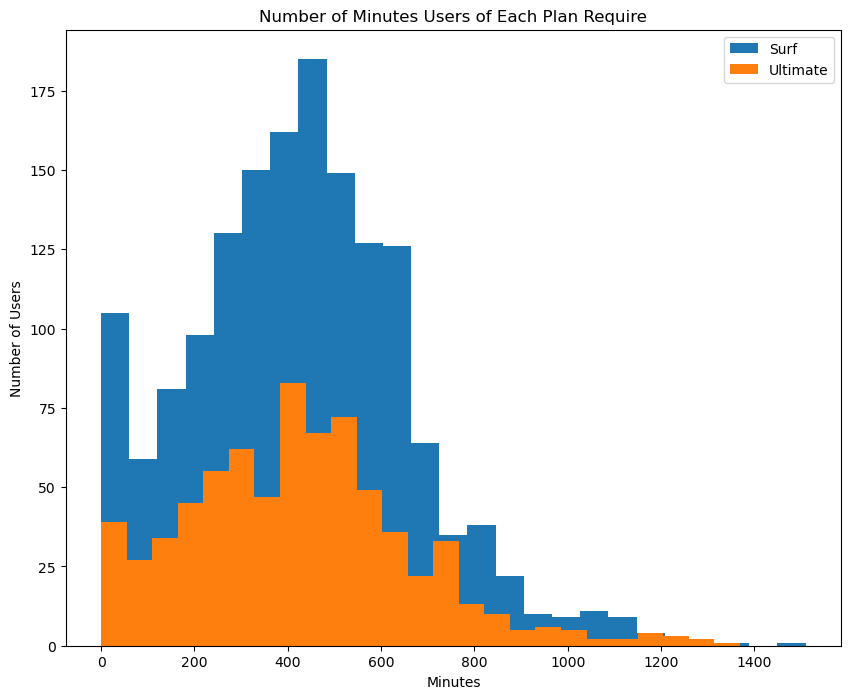

In [29]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_minutes = user_consumption[user_consumption['plan'] == 'surf']['num_mins_used']
ultimate_minutes = user_consumption[user_consumption['plan'] == 'ultimate']['num_mins_used']
user_consumption.groupby('plan')['num_mins_used'].plot.hist(legend=True, bins=25, figsize=(10,8))

# Add titles and labels
plt.legend(['Surf', 'Ultimate'])
plt.title('Number of Minutes Users of Each Plan Require')
plt.xlabel('Minutes')
plt.ylabel('Number of Users')
plt.show()

As we can see from the histogram above, the volume of minutes required for users each month on the Surf Plan is much greater than that of the Ultimate Plan. There is a peak at 200 users that require 450 minutes per month on the Surf Plan histogram. This is much greater than the peak on the Ultimate Plan where only 80 users require a little over 400 minutes. This tells us that there is a great difference in the amount of people that are enrolled in the Surf Plan vs the amount of people enrolled in the Ultimate Plan.

In [30]:
# Calculate the mean and the variance of the monthly call duration
user_consumption.pivot_table(index='plan', values=['num_mins_used'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,num_mins_used,num_mins_used,num_mins_used
plan,,,
surf,427.120329,235.490079,55455.577400
ultimate,428.071823,241.958423,58543.878652


The analysis of monthly call duration by plan reveals intriguing insights into user behavior and plan performance. On average, users subscribed to the 'surf' plan tend to have a monthly call duration of approximately 427.12 minutes, while those on the 'ultimate' plan exhibit a slightly higher average of around 428.07 minutes. However, despite this marginal difference in mean call duration, both plans demonstrate similar levels of variability. For the 'surf' plan, the variance in monthly call duration stands at approximately 55455.58 minutes squared, while for the 'ultimate' plan, it is slightly higher at about 58543.88 minutes squared. This indicates that while users may have similar average call durations, individual call usage patterns vary widely within each plan. Moreover, the standard deviation for the 'surf' plan is around 235.49 minutes, while for the 'ultimate' plan, it is slightly higher at approximately 241.96 minutes. These findings suggest that factors beyond plan type, such as user habits or communication needs, may contribute to the observed variations in call duration. By understanding these patterns, telecom companies can tailor their services and marketing strategies to better meet the diverse needs of their customer base and optimize service delivery.

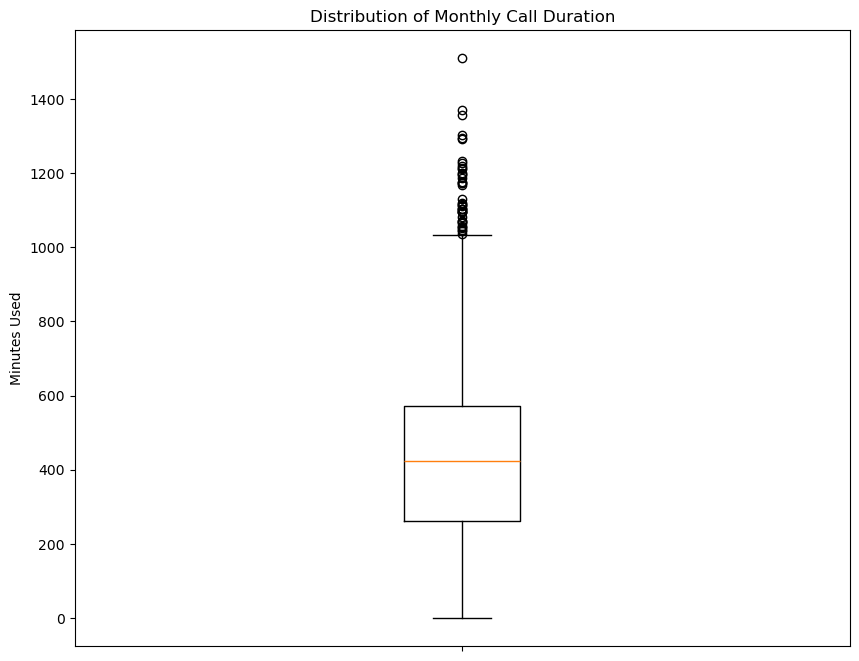

In [31]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 8))
plt.boxplot(user_consumption['num_mins_used'])
plt.title('Distribution of Monthly Call Duration')
plt.ylabel('Minutes Used')
plt.xticks([1], [''])
plt.show()

As we can see from the boxplot above, there is a short spread of the date. There is a very slight negative skew and a number of outliers in the distribution of the monthly calll duration of Megaline's customers.

### Messages

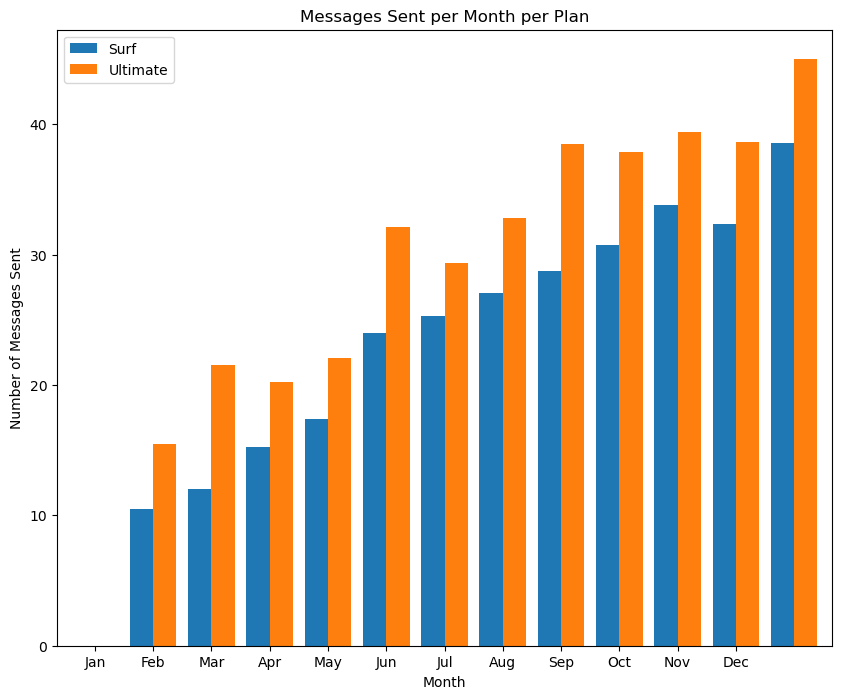

In [32]:
# Compare the number of messages users of each plan tend to send each month
num_messages_per_plan_per_month = user_consumption.groupby(['month', 'plan'])['num_messages_sent'].mean().unstack()
num_messages_per_plan_per_month.plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Messages Sent per Month per Plan')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Number of Messages Sent')
plt.legend(['Surf', 'Ultimate'])
plt.show()

As we can see from the bar plot above, the average number of messages sent per month from users on the Surf Plan tends to be less than that of the Ultimate Plan. This tells us that customers enrolled in the Ultimate Plan are taking advantage of the greater messaging limit. Also, there seems to be a rise in the averge number of messages sent per month as the year progresses. A possible explanation for this is that towards the end of the year there are more holidays and family gatherings (Christmas, Thanksgiving, New years, etc.), therefore more communication between family members via texts is required in order to plan/prepare for such events.

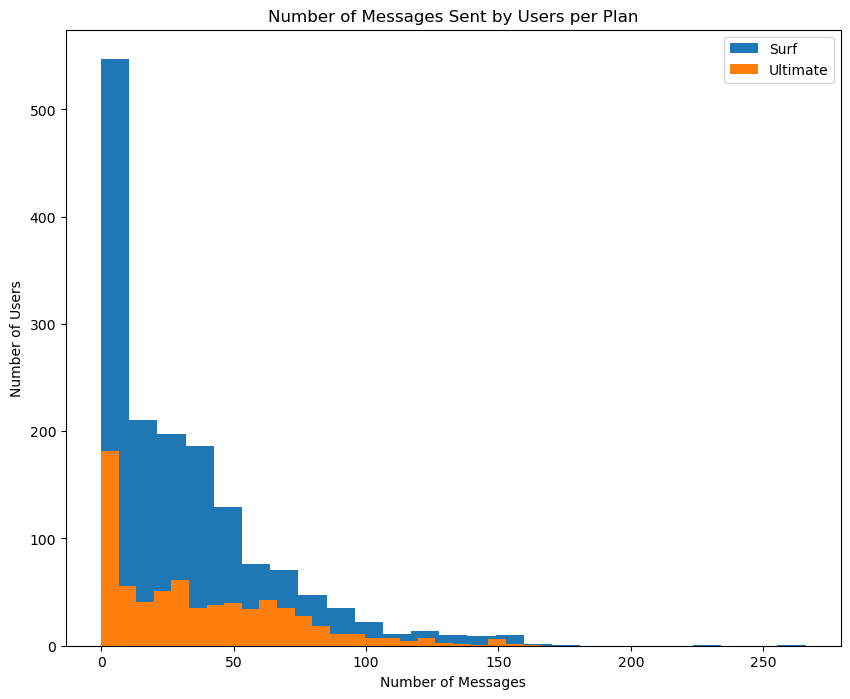

In [33]:
# Compare the amount of messages sent by users per plan
surf_messages = user_consumption[user_consumption['plan'] == 'surf']['num_messages_sent']
ultimate_messages = user_consumption[user_consumption['plan'] == 'ultimate']['num_messages_sent']
user_consumption.groupby('plan')['num_messages_sent'].plot.hist(legend=True, bins=25, figsize=(10,8))

# Add titles and labels
plt.legend(['Surf', 'Ultimate'])
plt.title('Number of Messages Sent by Users per Plan')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.show()

As we can see from the histogram above, the volume of messages sent by users on the Surf Plan is much greater than that of the Ultimate Plan. There is a peak at around 550 users that send 0-15 messages monthly on the Surf Plan histogram. This is much greater than the peak on the Ultimate Plan where less than 200 users send around 0-10 messages. This tells us that there is a great difference in the amount of people that are enrolled in the Surf Plan vs the amount of people enrolled in the Ultimate Plan. Despite the fact that users on the Ultimate Plan send more text messages on average per month, we can see from the histogram that there are clearly more users enrolled in the Surf Plan which accumulates a greater amount of total monthly messages sent.

In [34]:
# Calculate the mean and the variance of the amount of messages sent by plan
user_consumption.pivot_table(index='plan', values=['num_messages_sent'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,num_messages_sent,num_messages_sent,num_messages_sent
plan,,,
surf,31.041165,33.557683,1126.118076
ultimate,37.343923,34.782576,1209.827612


The examination of message volume by plan uncovers notable insights into user engagement and plan effectiveness. On average, subscribers to the 'ultimate' plan demonstrate a slightly higher engagement level, sending approximately 37.34 messages monthly, in contrast to users on the 'surf' plan who average around 31.04 messages. Despite this disparity in mean message counts, both plans showcase comparable variability in messaging behavior. The 'surf' plan exhibits a variance of approximately 1126.12 messages squared, while the 'ultimate' plan shows a slightly higher variance of about 1209.83 messages squared. Correspondingly, the standard deviation for the 'surf' plan is approximately 33.56 messages, whereas for the 'ultimate' plan, it is slightly elevated at around 34.78 messages. These findings suggest that while there may be discrepancies in average message counts between the plans, the distribution of messaging patterns remains relatively uniform across both user groups. Such insights can inform service optimization strategies, aiding telecom companies in tailoring their offerings to better match the evolving communication needs of their clientele.

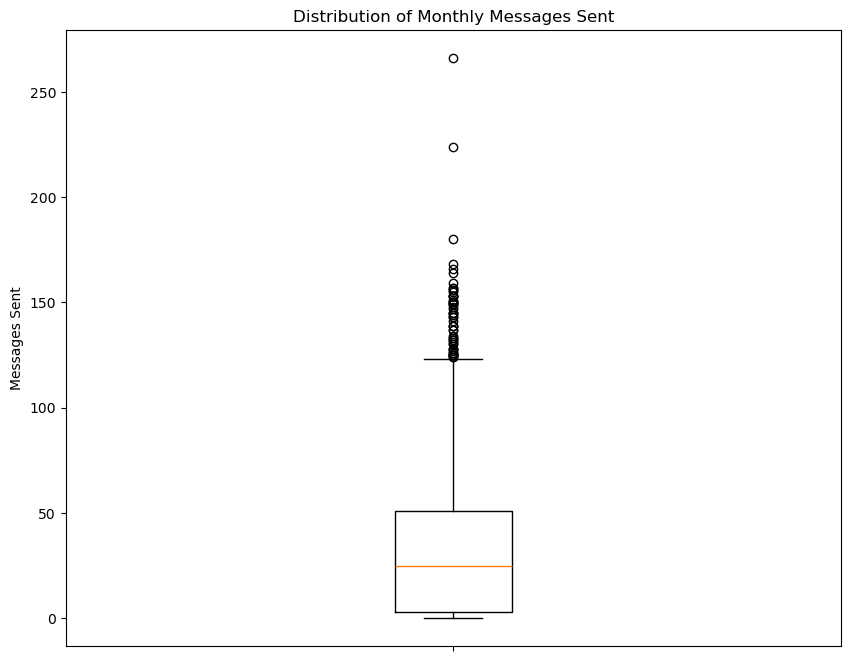

In [35]:
# Plot a boxplot to visualize the distribution of the monthlt amount of messages sent
plt.figure(figsize=(10, 8))
plt.boxplot(user_consumption['num_messages_sent'])
plt.title('Distribution of Monthly Messages Sent')
plt.ylabel('Messages Sent')
plt.xticks([1], [''])
plt.show()

As we can see from the boxplot above, there is a short spread of the date. There is a negative skew and a large amount of outliers in the distribution of monthly messages sent by Megaline's customers.

### Internet

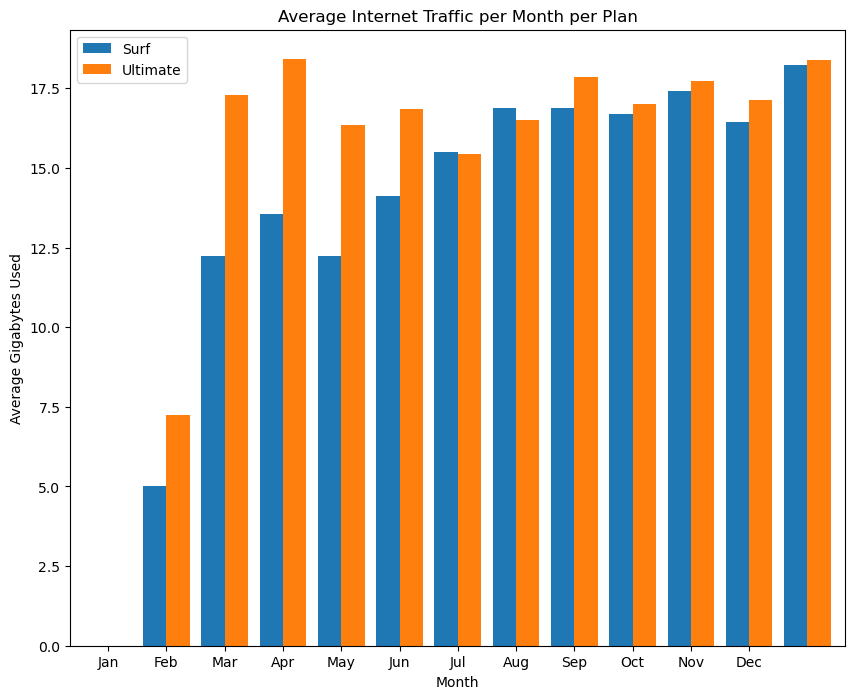

In [36]:
# Compare average amount of internet traffic consumed per each plan per each distinct month. Plot a bar plat to visualize it.
avg_gb_per_plan_per_month = user_consumption.groupby(['month', 'plan'])['num_gb_used'].mean().unstack()
avg_gb_per_plan_per_month.plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Average Internet Traffic per Month per Plan')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Average Gigabytes Used')
plt.legend(['Surf', 'Ultimate'])
plt.show()

As we can see from the bar plot above, the average volume of traffic from the Ultimate Plan is greater than that of the Surf Plan. This tells us that those enrolled in the Ultimate Plan are taking advantage of the the extra amount of gigabytes given to them.

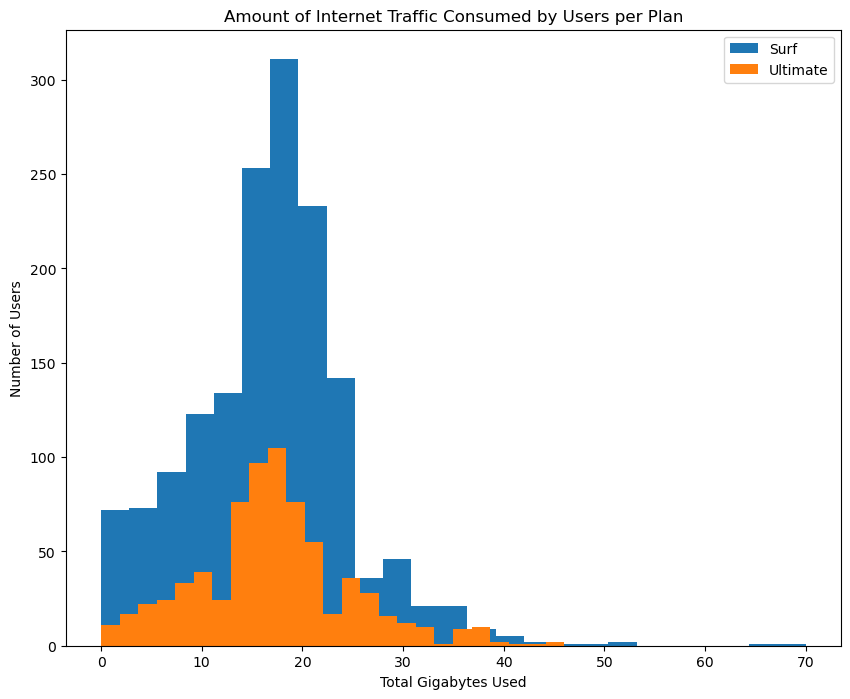

In [37]:
# Compare the amount of internet traffic consumed by users per plan
surf_traffic = user_consumption[user_consumption['plan'] == 'surf']['num_gb_used']
ultimate_traffic = user_consumption[user_consumption['plan'] == 'ultimate']['num_gb_used']
user_consumption.groupby('plan')['num_gb_used'].plot.hist(legend=True, bins=25, figsize=(10,8))

# Add titles and labels
plt.legend(['Surf', 'Ultimate'])
plt.title('Amount of Internet Traffic Consumed by Users per Plan')
plt.xlabel('Total Gigabytes Used')
plt.ylabel('Number of Users')
plt.show()

As we can see from the histogram above, the volume of internet traffic generated by users on the Surf Plan is much greater than that of the Ultimate Plan. There is a peak at around 300 users that require about 18-19 gigabytes on the Surf Plan histogram. This is greater than the peak on the Ultimate Plan where about 100 users on average require 17-18 gigabytes. This tells us that there is a great difference in the amount of people that are enrolled in the Surf Plan vs the amount of people enrolled in the Ultimate Plan. Despite the fact that users on the Ultimate Plan utlize more gigabytes on average per month, we can see from the histogram that there are clearly more users enrolled in the Surf Plan which accumulates a greater amount of total internet traffic.

In [38]:
# Calculate the mean and the variance of the internet traffic volume by plan
user_consumption.pivot_table(index='plan', values=['num_gb_used'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,num_gb_used,num_gb_used,num_gb_used
plan,,,
surf,16.607346,7.899502,62.402126
ultimate,17.211326,7.755841,60.153067


The examination of internet traffic volume by plan unveils valuable insights into user data consumption habits and plan performance. On average, subscribers to the 'ultimate' plan demonstrate a slightly higher data usage, consuming approximately 17.21 gigabytes (GB) monthly, compared to users on the 'surf' plan who average around 16.61 GB. Despite this variance in mean data consumption, both plans exhibit comparable variability in internet traffic volume. The 'surf' plan showcases a variance of approximately 62.40 GB squared, while the 'ultimate' plan displays a slightly lower variance of about 60.15 GB squared. Correspondingly, the standard deviation for the 'surf' plan is approximately 7.90 GB, whereas for the 'ultimate' plan, it is slightly lower at around 7.76 GB. These findings suggest that while there may be disparities in average data usage between the plans, the distribution of data consumption patterns remains relatively uniform across both user groups. Such insights can aid telecom companies in refining their service offerings to better align with the evolving data needs of their clientele.

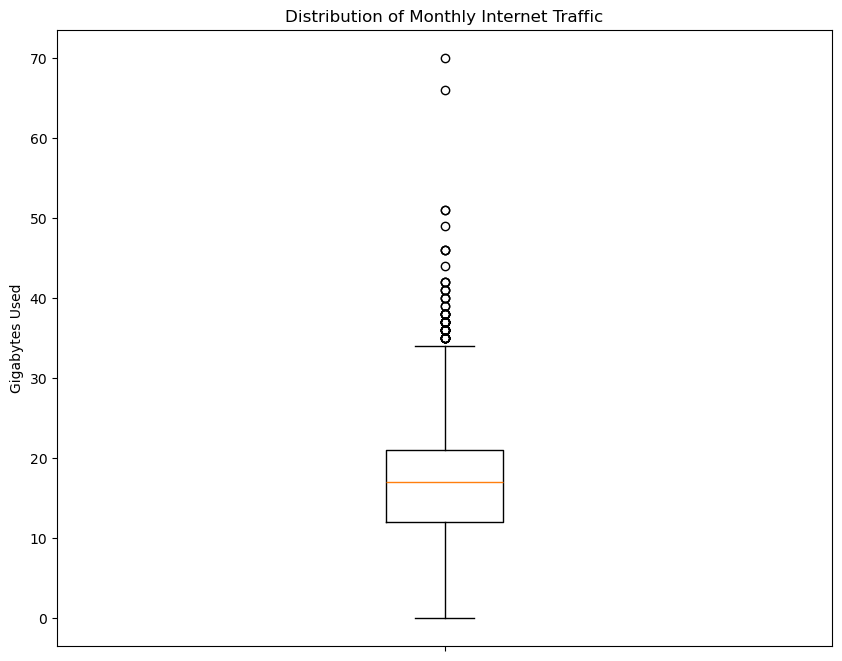

In [39]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic
plt.figure(figsize=(10, 8))
plt.boxplot(user_consumption['num_gb_used'])
plt.title('Distribution of Monthly Internet Traffic')
plt.xticks([1], [''])
plt.ylabel('Gigabytes Used')
plt.show()

As we can see from the boxplot above, there is a short spread of the data. Even though there are some outliers the distribution of Megaline's monthly internet traffic seems to be normal.

## Revenue

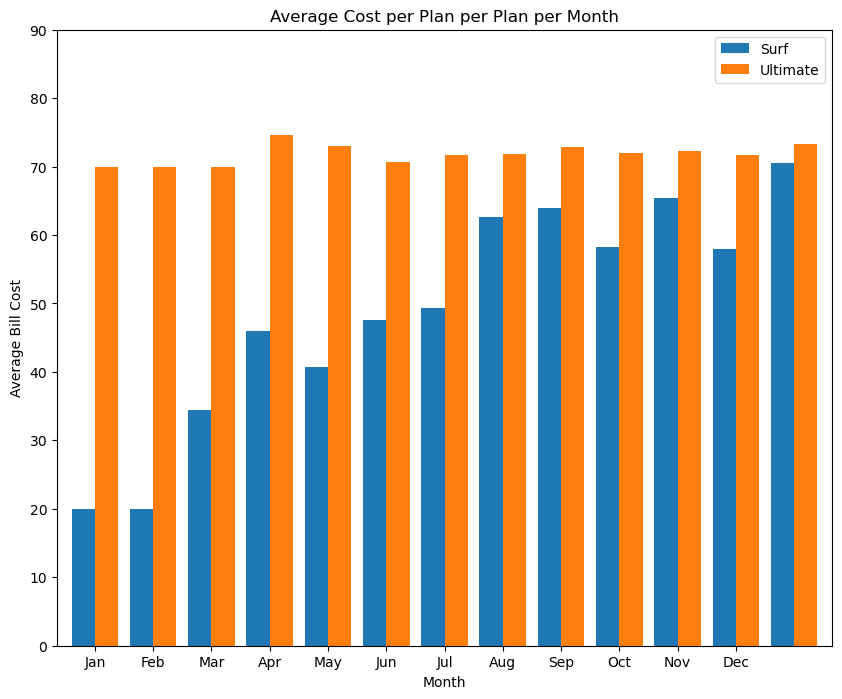

In [40]:
# Compare the average monthly cost users of each plan tend to pay each month
avg_rev_per_plan_per_month = user_consumption.groupby(['month', 'plan'])['monthly_rev'].mean().unstack()
avg_rev_per_plan_per_month.plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Average Cost per Plan per Plan per Month')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Average Bill Cost')
plt.ylim(0, 90)
plt.legend(['Surf', 'Ultimate'])
plt.show()

As we can see from the bar plot above, the average amount of revenue accumulated per month from users on the Surf Plan tends to be less than that of the Ultimate Plan. This makes sense because even though there are about twice as many users enrolled in the Surf Plan, the cost of said plan is $50 less than that of the Ultimate Plan. So even though the Ultimate Plan has less total users, because they are paying more than triple what the Surf Plan costs, the average revenue generated from them will be greater despite the difference in population size. This however, does not mean they are accumulating more total revenue for Megaline than users on the Surf Plan. We will further clarify this in the next visualization.

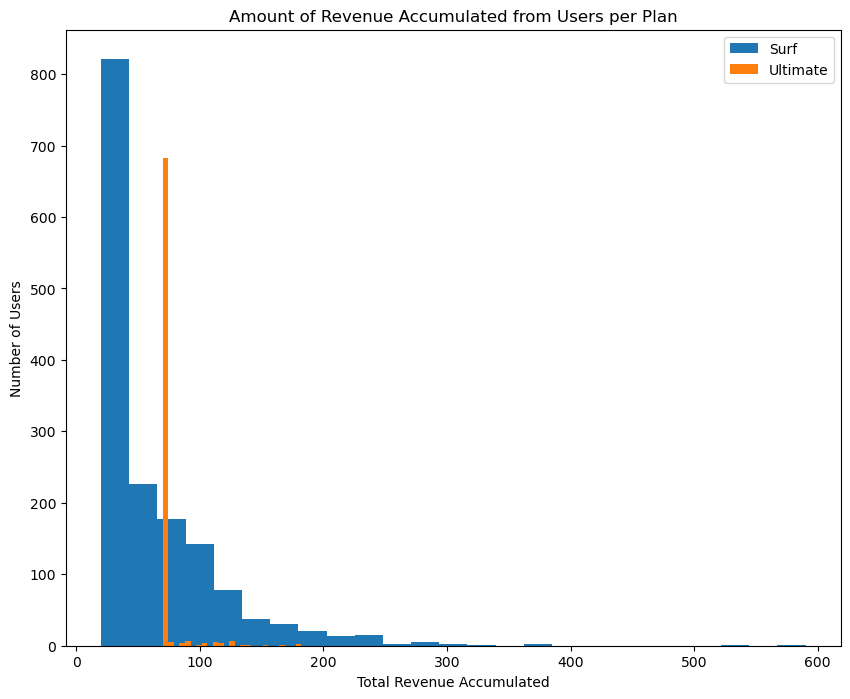

In [41]:
# Compare the amount of revenue accumulated from users per plan
surf_revenue = user_consumption[user_consumption['plan'] == 'surf']['monthly_rev']
ultimate_revenue = user_consumption[user_consumption['plan'] == 'ultimate']['monthly_rev']
user_consumption.groupby('plan')['monthly_rev'].plot.hist(legend=True, bins=25, figsize=(10,8))

# Add titles and labels
plt.legend(['Surf', 'Ultimate'])
plt.title('Amount of Revenue Accumulated from Users per Plan')
plt.xlabel('Total Revenue Accumulated')
plt.ylabel('Number of Users')
plt.show()

As we can see from the histogram above, the total revenue generated from the Surf Plan is far greater than that of the Ultimate Plan. Even though, users on the Ultimate Plan pay more on average than those on the Surf Plan, the number of users on the Surf Plan is more than double than that of the Ultimate Plan. And based on this visualization we can hypothesize that a good portion of users on the Surf Plan actually excede their monthly limits, which will generate more revenue.

In [42]:
# Calculate the mean and the variance of the amount of revenue by plan
user_consumption.pivot_table(index='plan', values=['monthly_rev'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,monthly_rev,monthly_rev,monthly_rev
plan,,,
surf,60.551729,55.339379,3062.446864
ultimate,72.301105,11.364839,129.159556


The analysis reveals that, on average, users subscribed to the 'ultimate' plan contribute slightly higher monthly revenue to Megaline (72.30 USD) compared to those on the 'surf' plan (60.55 USD). However, there is substantial variability in revenue among users on the 'surf' plan, as evidenced by the significantly higher standard deviation (55.34 USD) compared to the 'ultimate' plan (11.36 USD). In contrast, users on the 'ultimate' plan exhibit more consistent revenue generation, with a considerably lower standard deviation. These findings suggest that while the average revenue from 'ultimate' plan users is higher, there is more consistency in revenue generation from users on this plan compared to the 'surf' plan, where revenue varies significantly. This also prompts further investigation into why 'surf' plan users show higher revenue variability despite the lower average revenue per user.

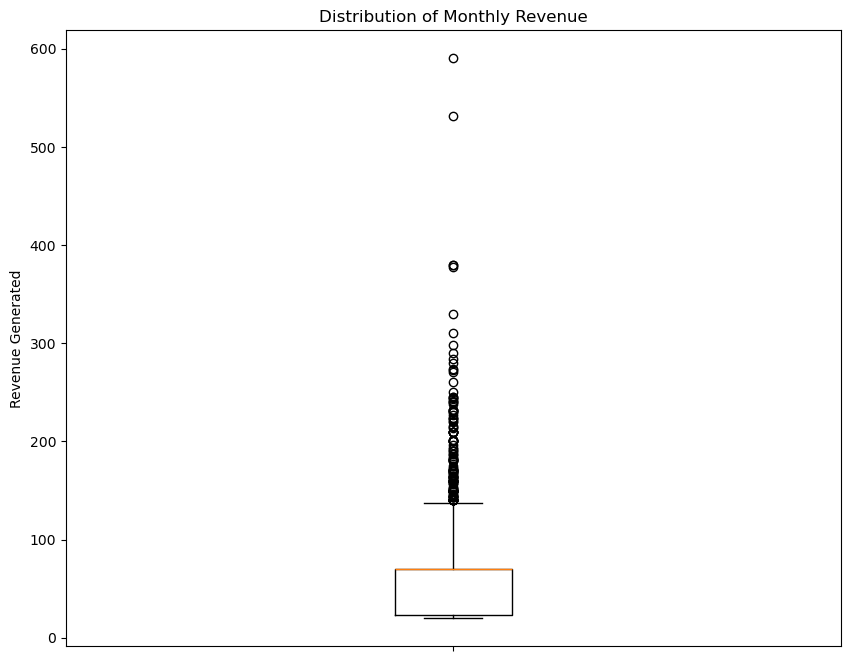

In [43]:
# Plot a boxplot to visualize the distribution of Megaline's monthly revenue
plt.figure(figsize=(10, 8))
plt.boxplot(user_consumption['monthly_rev'])
plt.title('Distribution of Monthly Revenue')
plt.ylabel('Revenue Generated')
plt.xticks([1], [''])
plt.show()

As we can see from the boxplot above, there is a short spread of the data. There is a negative skew and a large amount of outliers in the distribution of Megaline's monthly revenue.

## Test statistical hypotheses

We will now test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

In [44]:
# Test the hypotheses
  
# h0 = There is no difference in monthly revenue between the Surf and Ultimate calling plans.
# h1 = There is a difference in monthly revenue between the Surf and Ultimate calling plans.

surf_rev = user_consumption[user_consumption['plan'] == 'surf']['monthly_rev']
ult_rev = user_consumption[user_consumption['plan'] == 'ultimate']['monthly_rev']

# Perform independent samples t-test
results = st.ttest_ind(surf_rev, ult_rev)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis. There is a difference in revenue between Surf Plan users and Ultimate Plan users.")

else:
    print("We cannot reject the null hypothesis. There is no sufficient evidence to suggest a difference in revenue between Surf Plan users and Ultimate Plan users.")

p-value: 1.7244233141242195e-08

We reject the null hypothesis. There is a difference in revenue between Surf Plan users and Ultimate Plan users.


After conducting an independent samples t-test to examine the disparity in average revenue between Surf and Ultimate plan users, the analysis yielded a statistically significant result, with a p-value of 1.72e-08, leading to the rejection of the null hypothesis. This suggests evidence of a difference in revenue between the two plan groups at the specified significance level of 0.05. However, it's crucial to emphasize that rejecting the null hypothesis does not inherently confirm the alternative hypothesis. While the test indicates the presence of a revenue disparity, further investigation is warranted to fully understand the extent and implications of this difference. Therefore, while the analysis provides valuable insights into the impact of calling plans on revenue generation, additional factors should be considered for a comprehensive understanding of user behavior and market dynamics.

We will now test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [45]:
# Test the hypotheses
  
# h0 = There is no difference in monthly revenue between NJ/NY Megaline users and users from the rest of the country.
# h1 = There is a difference in revenue between between NJ/NY Megaline users and users from the rest of the country.

# Calculate means for both groups
nynj_rev = user_consumption[user_consumption['city'].str.contains('NJ|NY')]['monthly_rev']
not_nynj_rev = user_consumption[~user_consumption['city'].str.contains('NJ|NY')]['monthly_rev']

# Perform independent samples t-test
results = st.ttest_ind(nynj_rev, not_nynj_rev)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis. There is a difference in revenue between NJ/NY Megaline users and users from the rest of the country.")

else:
    print("We cannot reject the null hypothesis. There is no sufficient evidence to suggest a difference in revenue between NJ/NY Megaline users and users from the rest of the country.")

p-value: 0.12496457182859122

We cannot reject the null hypothesis. There is no sufficient evidence to suggest a difference in revenue between NJ/NY Megaline users and users from the rest of the country.


In this analysis, I conducted an independent samples t-test to examine if there's a significant difference in average revenue between users in the NY-NJ area and users from other regions. The null hypothesis posited that there's no discrepancy in monthly revenue between these two groups, while the alternative hypothesis suggested otherwise. After calculating the means for both groups and performing the t-test, the resulting p-value was about 0.12. Comparing this p-value to the chosen significance level (alpha) of 0.05, I found that it exceeds the threshold. Consequently, I failed to reject the null hypothesis, indicating insufficient evidence to suggest a difference in revenue between NY-NJ Megaline users and users from other regions.

## General conclusion

Based on the extensive analysis conducted, it is evident that there exists a significant difference in revenue between users subscribed to Megaline's Surf and Ultimate calling plans. Despite the slightly higher average revenue per user observed among Ultimate plan subscribers, the larger user base of the Surf plan, coupled with potential overage charges, leads to a greater total revenue generation. This underscores the importance of understanding user behavior patterns and their revenue implications in informing pricing strategies and plan features. Furthermore, while initial hypotheses suggested regional differences in revenue between NY-NJ area users and those from other regions, the analysis did not provide sufficient evidence to support such disparities. These findings emphasize the need for tailored marketing strategies and service offerings that account for nuanced differences in user behavior and regional variations, ultimately enabling Megaline to optimize its revenue generation and enhance customer satisfaction across diverse user segments.